In [5]:
import os
import pandas as pd

In [6]:
# Load data
data_path = "../data"
X_train = pd.read_csv(os.path.join(data_path, "X_train_pca.csv"))
y_train_org = pd.read_csv(os.path.join(data_path, "y_train_pca.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test_pca.csv"))
y_test_org = pd.read_csv(os.path.join(data_path, "y_test_pca.csv"))

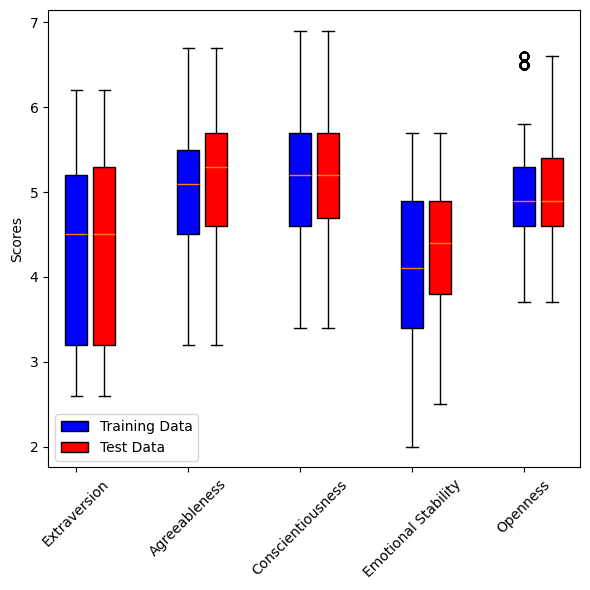

In [7]:
import matplotlib.pyplot as plt

# Select the numerical columns for which you want to create box plots
numerical_columns = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Openness']

plt.figure(figsize=(6, 6))

# Adjust positions for the training data
train_positions = [x for x in range(1, 2*len(numerical_columns), 2)]
box1 =plt.boxplot([y_train_org[col] for col in numerical_columns], positions=train_positions, vert=True, widths=0.4, patch_artist=True, boxprops=dict(facecolor="blue"))

# Adjust positions for the test data
test_positions = [x+0.5 for x in train_positions]
box2 =plt.boxplot([y_test_org[col] for col in numerical_columns], positions=test_positions, vert=True, widths=0.4, patch_artist=True, boxprops=dict(facecolor="red"))

plt.xticks(train_positions, numerical_columns, rotation=45)
plt.ylabel('Scores')

legend_colors = [box1["boxes"][0], box2["boxes"][0]] 
plt.legend(legend_colors, ['Training Data', 'Test Data'])

plt.tight_layout()
plt.savefig('figures/train_test_distributions.png')
plt.show()


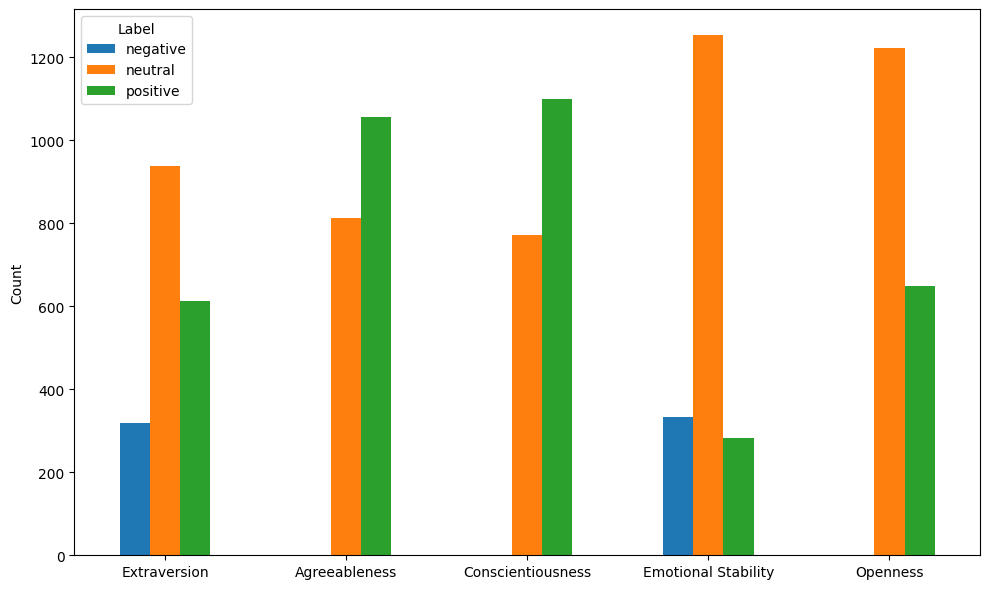

In [8]:
bin_columns = [col for col in y_train_org.columns if '_bin' in col]

# Get the counts
counts = y_train_org[bin_columns].apply(lambda x: x.value_counts()).fillna(0).T

# Plot
ax = counts.plot(kind='bar', figsize=(10,6))
plt.ylabel('Count')
plt.tight_layout()
plt.legend(title='Label')

labels = [label.get_text().replace('_bin', '') for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('figures/train_bin_distributions.png')
plt.show()


